In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Import, Concat

In [4]:
sd_00 = pd.read_csv("StormEvents_details-ftp_v1.0_d2000.csv")
sd_01 = pd.read_csv("StormEvents_details-ftp_v1.0_d2001.csv")
sd_02 = pd.read_csv("StormEvents_details-ftp_v1.0_d2002.csv")
sd_03 = pd.read_csv("StormEvents_details-ftp_v1.0_d2003.csv")
sd_04 = pd.read_csv("StormEvents_details-ftp_v1.0_d2004.csv")
sd_05 = pd.read_csv("StormEvents_details-ftp_v1.0_d2005.csv")
sd_06 = pd.read_csv("StormEvents_details-ftp_v1.0_d2006.csv")
sd_07 = pd.read_csv("StormEvents_details-ftp_v1.0_d2007.csv")
sd_08 = pd.read_csv("StormEvents_details-ftp_v1.0_d2008.csv")
sd_09 = pd.read_csv("StormEvents_details-ftp_v1.0_d2009.csv")
sd_10 = pd.read_csv("StormEvents_details-ftp_v1.0_d2010.csv")
sd_11 = pd.read_csv("StormEvents_details-ftp_v1.0_d2011.csv")
sd_12 = pd.read_csv("StormEvents_details-ftp_v1.0_d2012.csv")
sd_13 = pd.read_csv("StormEvents_details-ftp_v1.0_d2013.csv")
sd_14 = pd.read_csv("StormEvents_details-ftp_v1.0_d2014.csv")
sd_15 = pd.read_csv("StormEvents_details-ftp_v1.0_d2015.csv")
sd_16 = pd.read_csv("StormEvents_details-ftp_v1.0_d2016.csv")
sd_17 = pd.read_csv("StormEvents_details-ftp_v1.0_d2017.csv")
sd_18 = pd.read_csv("StormEvents_details-ftp_v1.0_d2018_c20200716.csv")
sd_19 = pd.read_csv("StormEvents_details-ftp_v1.0_d2019_c20200716.csv")
sd_20 = pd.read_csv("StormEvents_details-ftp_v1.0_d2020_c20200716.csv")

In [5]:
sl_00 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2000.csv")
sl_01 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2001.csv")
sl_02 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2002.csv")
sl_03 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2003.csv")
sl_04 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2004.csv")
sl_05 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2005.csv")
sl_06 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2006.csv")
sl_07 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2007.csv")
sl_08 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2008.csv")
sl_09 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2009.csv")
sl_10 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2010.csv")
sl_11 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2011.csv")
sl_12 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2012.csv")
sl_13 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2013.csv")
sl_14 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2014.csv")
sl_15 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2015.csv")
sl_16 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2016.csv")
sl_17 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2017.csv")
sl_18 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2018_c20200716.csv")
sl_19 = pd.read_csv('StormEvents_locations-ftp_v1.0_d2019_c20200716.csv')
sl_20 = pd.read_csv('StormEvents_locations-ftp_v1.0_d2020_c20200716.csv')

In [6]:
SF_c00_14 = pd.read_csv("SFAP_00_14.csv")
SF_c15 = pd.read_csv("SFAP15.csv")
SF_c16 = pd.read_csv("SFAP16.csv")
SF_c17 = pd.read_csv("SFAP17.csv")
SF_c18 = pd.read_csv("SFAP18.csv")
SF_c19 = pd.read_csv("SFAP19.csv")
SF_c20 = pd.read_csv("SFAP20.csv")

In [7]:
storm_detail = pd.concat([sd_00, sd_01, sd_02, sd_03, sd_04, sd_05, sd_06, sd_07, sd_08, sd_09, 
                          sd_10, sd_11, sd_12, sd_13, sd_14, sd_15, sd_16, sd_17, sd_18, sd_19, sd_20], axis = 0, ignore_index = False)
storm_location = pd.concat([sl_00, sl_01, sl_02, sl_03, sl_04, sl_05, sl_06, sl_07, sl_08, sl_09, 
                          sl_10, sl_11, sl_12, sl_13, sl_14, sl_15, sl_16, sl_17, sl_18, sl_19, sl_20], axis = 0, ignore_index = False)


In [34]:
SF = pd.concat([SF_c00_14, SF_c15, SF_c16, SF_c17,SF_c18, SF_c19, SF_c20], axis = 0, ignore_index = False)

In [35]:
SF.columns

Index(['DATE', 'DEWP', 'DEWP_ATTRIBUTES', 'ELEVATION', 'FRSHTT',
       'FRSHTT_ATTRIBUTES', 'GUST', 'GUST_ATTRIBUTES', 'LATITUDE', 'LONGITUDE',
       'MAX', 'MAX_ATTRIBUTES', 'MIN', 'MIN_ATTRIBUTES', 'MXSPD',
       'MXSPD_ATTRIBUTES', 'NAME', 'PRCP', 'PRCP_ATTRIBUTES', 'SLP',
       'SLP_ATTRIBUTES', 'SNDP', 'SNDP_ATTRIBUTES', 'STATION', 'STP',
       'STP_ATTRIBUTES', 'TEMP', 'TEMP_ATTRIBUTES', 'VISIB',
       'VISIB_ATTRIBUTES', 'WDSP', 'WDSP_ATTRIBUTES'],
      dtype='object')

In [36]:
SF = pd.DataFrame(SF, columns = ["DATE", "DEWP", "ELEVATION", "GUST", "MAX", 
                                 "MIN", "MXSPD", "NAME", "PRCP", "SLP", "SNDP",
                                 "STATION", "STP", "TEMP", "VISIB", "WDSP"])
SF.head()

,DATE,DEWP,ELEVATION,GUST,MAX,MIN,MXSPD,NAME,PRCP,SLP,SNDP,STATION,STP,TEMP,VISIB,WDSP
0,2000-01-01,45.4,2.4,25.1,54.0,39.9,17.1,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.00,1018.3,999.9,72494023234,999.9,50.7,9.9,8.3
1,2000-01-02,41.0,2.4,21.0,55.0,39.9,20.0,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.00,1023.9,999.9,72494023234,999.9,48.4,9.9,9.5
2,2000-01-03,43.4,2.4,999.9,55.9,39.9,14.0,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.00,1030.0,999.9,72494023234,999.9,47.8,9.9,5.7
3,2000-01-04,44.1,2.4,999.9,73.0,39.9,10.1,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.00,1031.3,999.9,72494023234,999.9,55.9,9.9,4.5
4,2000-01-05,47.0,2.4,999.9,73.0,45.0,11.1,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.01,1027.8,999.9,72494023234,999.9,54.1,9.8,5.8


In [37]:
storm_detail_SF = storm_detail.loc[storm_detail['CZ_NAME'].str.contains('SAN FRANCISCO')]
storm_detail_SF.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
7805,200003,19,1510,200003,20,400,1092591,5135601,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDC
22279,200006,14,1200,200006,14,1700,1097073,5152903,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This unusual early summer record breaking heat...,NaN,PDC
1458,200111,24,700,200111,24,1000,1125671,5275191,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS
5069,200101,11,1000,200101,11,1400,1110278,5227916,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong low pressure produced large waves and...,PDS
10631,200102,11,800,200102,12,800,1112003,5236162,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS


In [38]:
storm_detail_SF.shape

(488, 51)

# Labeling Storm Occurrence

In [39]:
storm_detail_SF['BEGIN_YEARMONTH'] = storm_detail_SF['BEGIN_YEARMONTH'].astype(str)
storm_detail_SF['BEGIN_DAY'] = storm_detail_SF['BEGIN_DAY'].astype(str)
storm_detail_SF['DAY_'] = storm_detail_SF['BEGIN_DAY']
# storm_detail_SF.loc[storm_detail_SF.BEGIN_DAY.str.len() == 1, "DAY_"] = '0' + storm_detail_SF['BEGIN_DAY']

In [40]:
storm_detail_SF.loc[storm_detail_SF.BEGIN_DAY.str.len() == 1, "DAY_"] += '0'

In [41]:
storm_detail_SF.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,DAY_
7805,200003,19,1510,200003,20,400,1092591,5135601,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDC,19
22279,200006,14,1200,200006,14,1700,1097073,5152903,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,This unusual early summer record breaking heat...,NaN,PDC,14
1458,200111,24,700,200111,24,1000,1125671,5275191,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS,24
5069,200101,11,1000,200101,11,1400,1110278,5227916,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong low pressure produced large waves and...,PDS,11
10631,200102,11,800,200102,12,800,1112003,5236162,CALIFORNIA,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS,11


In [42]:
storm_detail_SF['DATE_NEW'] = storm_detail_SF['BEGIN_YEARMONTH'].str[0:4] + \
                              '-' + storm_detail_SF['BEGIN_YEARMONTH'].str[4:] + \
                              '-' + storm_detail_SF['DAY_']
storm_detail_SF['DATE_NEW']

7805     2000-03-19
22279    2000-06-14
1458     2001-11-24
5069     2001-01-11
10631    2001-02-11
            ...    
15655    2020-02-90
15656    2020-02-90
16037    2020-02-90
16221    2020-02-90
16222    2020-02-90
Name: DATE_NEW, Length: 488, dtype: object

In [43]:
SF.head()

,DATE,DEWP,ELEVATION,GUST,MAX,MIN,MXSPD,NAME,PRCP,SLP,SNDP,STATION,STP,TEMP,VISIB,WDSP
0,2000-01-01,45.4,2.4,25.1,54.0,39.9,17.1,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.00,1018.3,999.9,72494023234,999.9,50.7,9.9,8.3
1,2000-01-02,41.0,2.4,21.0,55.0,39.9,20.0,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.00,1023.9,999.9,72494023234,999.9,48.4,9.9,9.5
2,2000-01-03,43.4,2.4,999.9,55.9,39.9,14.0,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.00,1030.0,999.9,72494023234,999.9,47.8,9.9,5.7
3,2000-01-04,44.1,2.4,999.9,73.0,39.9,10.1,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.00,1031.3,999.9,72494023234,999.9,55.9,9.9,4.5
4,2000-01-05,47.0,2.4,999.9,73.0,45.0,11.1,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.01,1027.8,999.9,72494023234,999.9,54.1,9.8,5.8


In [44]:
SF['STORM'] = SF.DATE.apply(lambda x: 1 if x in list(storm_detail_SF['DATE_NEW']) else 0)
SF['STORM']

0     0
1     0
2     0
3     0
4     0
     ..
55    0
56    0
57    0
58    0
59    0
Name: STORM, Length: 7366, dtype: int64

# Exploratory Data Analysis
### Checking that the target variable is binary

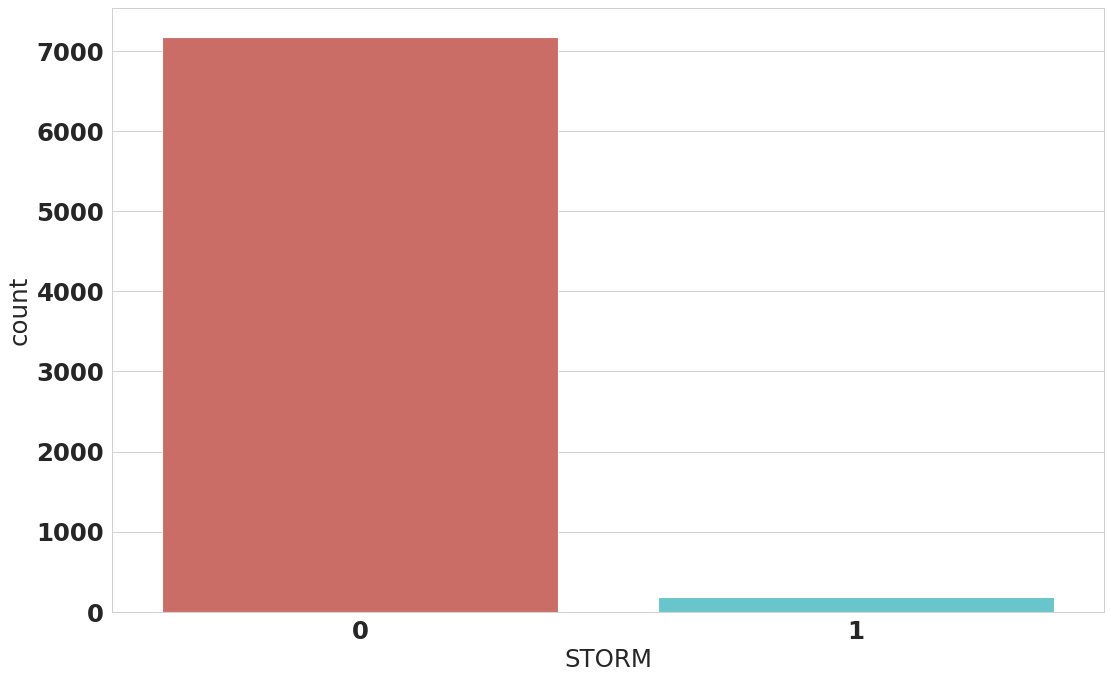

In [45]:
font = {'family' : 'normal',
  'weight' : 'bold',
  'size' : 22}
plt.rc('font', **font)
plt.figure(figsize=(16,10), dpi=80)
sb.countplot(x='STORM', data=SF, palette='hls')


In [46]:
SF.drop(['STATION','ELEVATION','NAME', 'SNDP', 'DATE'], axis=1, inplace=True)

### Data Processing

In [47]:
SF.dtypes

DEWP     float64
GUST     float64
MAX      float64
MIN      float64
MXSPD    float64
PRCP     float64
SLP      float64
STP      float64
TEMP     float64
VISIB    float64
WDSP     float64
STORM      int64
dtype: object

### Check for missing value, outliers

In [48]:
SF.isnull().sum()

DEWP     0
GUST     0
MAX      0
MIN      0
MXSPD    0
PRCP     0
SLP      0
STP      0
TEMP     0
VISIB    0
WDSP     0
STORM    0
dtype: int64

In [49]:
SF

,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,STORM
0,45.4,25.1,54.0,39.9,17.1,0.00,1018.3,999.9,50.7,9.9,8.3,0
1,41.0,21.0,55.0,39.9,20.0,0.00,1023.9,999.9,48.4,9.9,9.5,0
2,43.4,999.9,55.9,39.9,14.0,0.00,1030.0,999.9,47.8,9.9,5.7,0
3,44.1,999.9,73.0,39.9,10.1,0.00,1031.3,999.9,55.9,9.9,4.5,0
4,47.0,999.9,73.0,45.0,11.1,0.01,1027.8,999.9,54.1,9.8,5.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55,41.2,999.9,75.9,44.1,18.1,0.00,1025.2,24.5,56.5,10.0,5.1,0
56,41.8,999.9,75.9,46.9,12.0,0.00,1025.4,24.8,59.2,10.0,4.0,0
57,43.8,999.9,73.9,48.9,11.1,0.00,1024.0,23.4,59.7,9.9,3.7,0
58,48.6,999.9,75.9,48.9,15.9,0.00,1020.2,19.6,60.6,9.9,4.0,0


* fill in all the nan values with mean

In [36]:
SF.iloc[:, 1:12] = SF.iloc[:, 1:12].apply(lambda x: x.fillna(x.mean()),axis=0)
# timeseries.iloc[:,:10] = timeseries.iloc[:,:10].apply(lambda x: x.fillna(x.mean()),axis=0)

In [50]:
SF.describe()

,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,STORM
count,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000
mean,48.288216,475.828455,67.622794,50.423011,18.307589,0.065721,1019.187035,228.861444,57.487687,9.479161,8.809449,0.025115
std,5.895431,485.025835,8.628903,5.667157,5.789640,1.181516,148.085446,405.057400,5.712070,0.997128,3.984775,0.156486
min,14.000000,12.000000,46.900000,30.200000,2.900000,0.000000,987.200000,0.200000,40.500000,1.500000,0.500000,0.000000
25%,44.900000,25.100000,61.000000,46.900000,15.000000,0.000000,1013.600000,13.700000,53.400000,9.500000,5.900000,0.000000
50%,49.200000,36.900000,66.900000,51.100000,19.000000,0.000000,1016.300000,17.200000,57.600000,9.900000,8.700000,0.000000
75%,52.500000,999.900000,73.000000,55.000000,22.000000,0.000000,1019.700000,24.675000,61.300000,10.000000,11.400000,0.000000
max,64.000000,999.900000,105.100000,72.000000,47.600000,99.990000,9999.900000,999.900000,82.700000,11.300000,26.000000,1.000000


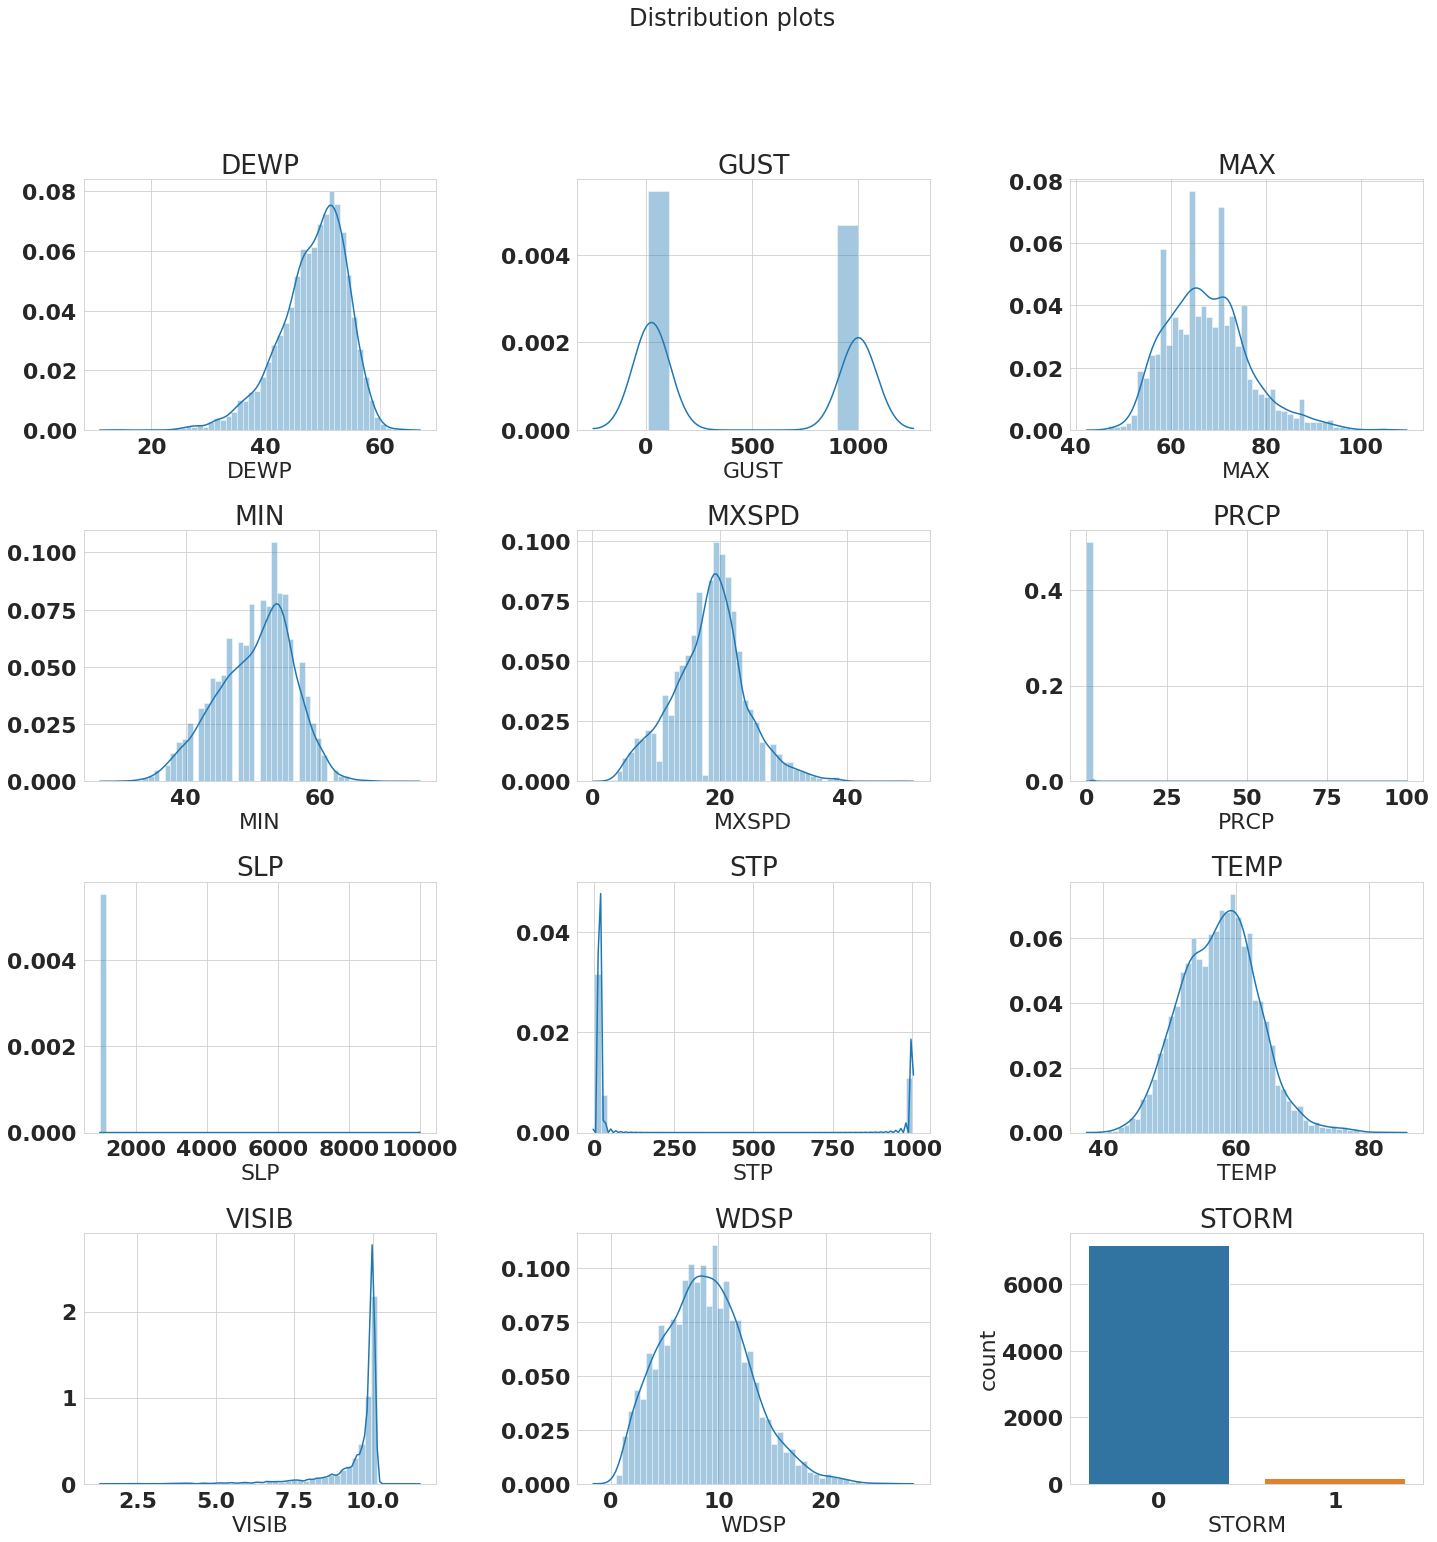

In [51]:
plt.figure(figsize = (24, 24))
plt.suptitle("Distribution plots", fontsize = 24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(4, 3, 1)
plt.title("DEWP")
sb.distplot(SF['DEWP'])

plt.subplot(4, 3, 2)
plt.title("GUST")
sb.distplot(SF['GUST'])

plt.subplot(4, 3, 3)
plt.title("MAX")
sb.distplot(SF['MAX'])

plt.subplot(4, 3, 4)
plt.title("MIN")
sb.distplot(SF['MIN'])

plt.subplot(4, 3, 5)
plt.title("MXSPD")
sb.distplot(SF['MXSPD'])

plt.subplot(4, 3, 6)
plt.title("PRCP")
sb.distplot(SF['PRCP'])

plt.subplot(4, 3, 7)
plt.title("SLP")
sb.distplot(SF['SLP'])

plt.subplot(4, 3, 8)
plt.title("STP")
sb.distplot(SF['STP'])

plt.subplot(4, 3, 9)
plt.title("TEMP")
sb.distplot(SF['TEMP'])

plt.subplot(4, 3, 10)
plt.title("VISIB")
sb.distplot(SF['VISIB'])

plt.subplot(4, 3, 11)
plt.title("WDSP")
sb.distplot(SF['WDSP'])

plt.subplot(4, 3, 12)
plt.title("STORM")
sb.countplot(SF['STORM'])

plt.show()

* From the distribution plot we can see that there are outliers in the 'GUST', 'PRCP', 'SLP', 'STP'


* find out the outliers

In [33]:
np.abs(800 - 900)

100

In [52]:
# SLP
uni_SLP = SF['SLP'].unique()
mean_SLP = SF['SLP'].mean()
std_SLP = SF['SLP'].std()
outliers = []
for val in uni_SLP:
    if np.abs(val - mean_SLP) > std_SLP * 3:
        outliers.append(val)
print(outliers)
# replace the outlier with the nan
for val in outliers:
    SF['SLP'].replace(val, np.nan, inplace=True)

[9999.9]


In [54]:
# GUST
uni_SLP = SF['GUST'].unique()
mean_SLP = SF['GUST'].mean()
std_SLP = SF['GUST'].std()
outliers = []
for val in uni_SLP:
    if np.abs(val - mean_SLP) > std_SLP:
        outliers.append(val)
print(outliers)
for val in outliers:
    SF['GUST'].replace(val, np.nan, inplace=True)

[999.9]


In [56]:
# PRCP
uni_SLP = SF['PRCP'].unique()
mean_SLP = SF['PRCP'].mean()
std_SLP = SF['PRCP'].std()
outliers = []
for val in uni_SLP:
    if np.abs(val - mean_SLP) > std_SLP * 3:
        outliers.append(val)
print(outliers)
for val in outliers:
    SF['PRCP'].replace(val, np.nan, inplace=True)

[99.99]


In [58]:
# STP
uni_SLP = SF['STP'].unique()
mean_SLP = SF['STP'].mean()
std_SLP = SF['STP'].std()
outliers = []
for val in uni_SLP:
    if np.abs(val - mean_SLP) > std_SLP:
        outliers.append(val)
print(outliers)
# questions what are these outliers do we keep them?

[999.9, 998.8, 999.7, 997.1, 992.0, 986.0, 989.1, 998.9, 998.2, 998.5, 999.6, 999.2, 994.9, 999.4, 997.8]


In [59]:
SF.iloc[:, 1:12] = SF.iloc[:, 1:12].apply(lambda x: x.fillna(x.mean()),axis=0)

In [60]:
SF.describe()

,DEWP,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP,STORM
count,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000
mean,48.288216,27.039365,67.622794,50.423011,18.307589,0.052153,1016.747949,228.861444,57.487687,9.479161,8.809449,0.025115
std,5.895431,4.531466,8.628903,5.667157,5.789640,0.200194,4.647354,405.057400,5.712070,0.997128,3.984775,0.156486
min,14.000000,12.000000,46.900000,30.200000,2.900000,0.000000,987.200000,0.200000,40.500000,1.500000,0.500000,0.000000
25%,44.900000,25.100000,61.000000,46.900000,15.000000,0.000000,1013.600000,13.700000,53.400000,9.500000,5.900000,0.000000
50%,49.200000,27.039365,66.900000,51.100000,19.000000,0.000000,1016.300000,17.200000,57.600000,9.900000,8.700000,0.000000
75%,52.500000,27.039365,73.000000,55.000000,22.000000,0.000000,1019.700000,24.675000,61.300000,10.000000,11.400000,0.000000
max,64.000000,61.400000,105.100000,72.000000,47.600000,3.540000,1034.700000,999.900000,82.700000,11.300000,26.000000,1.000000


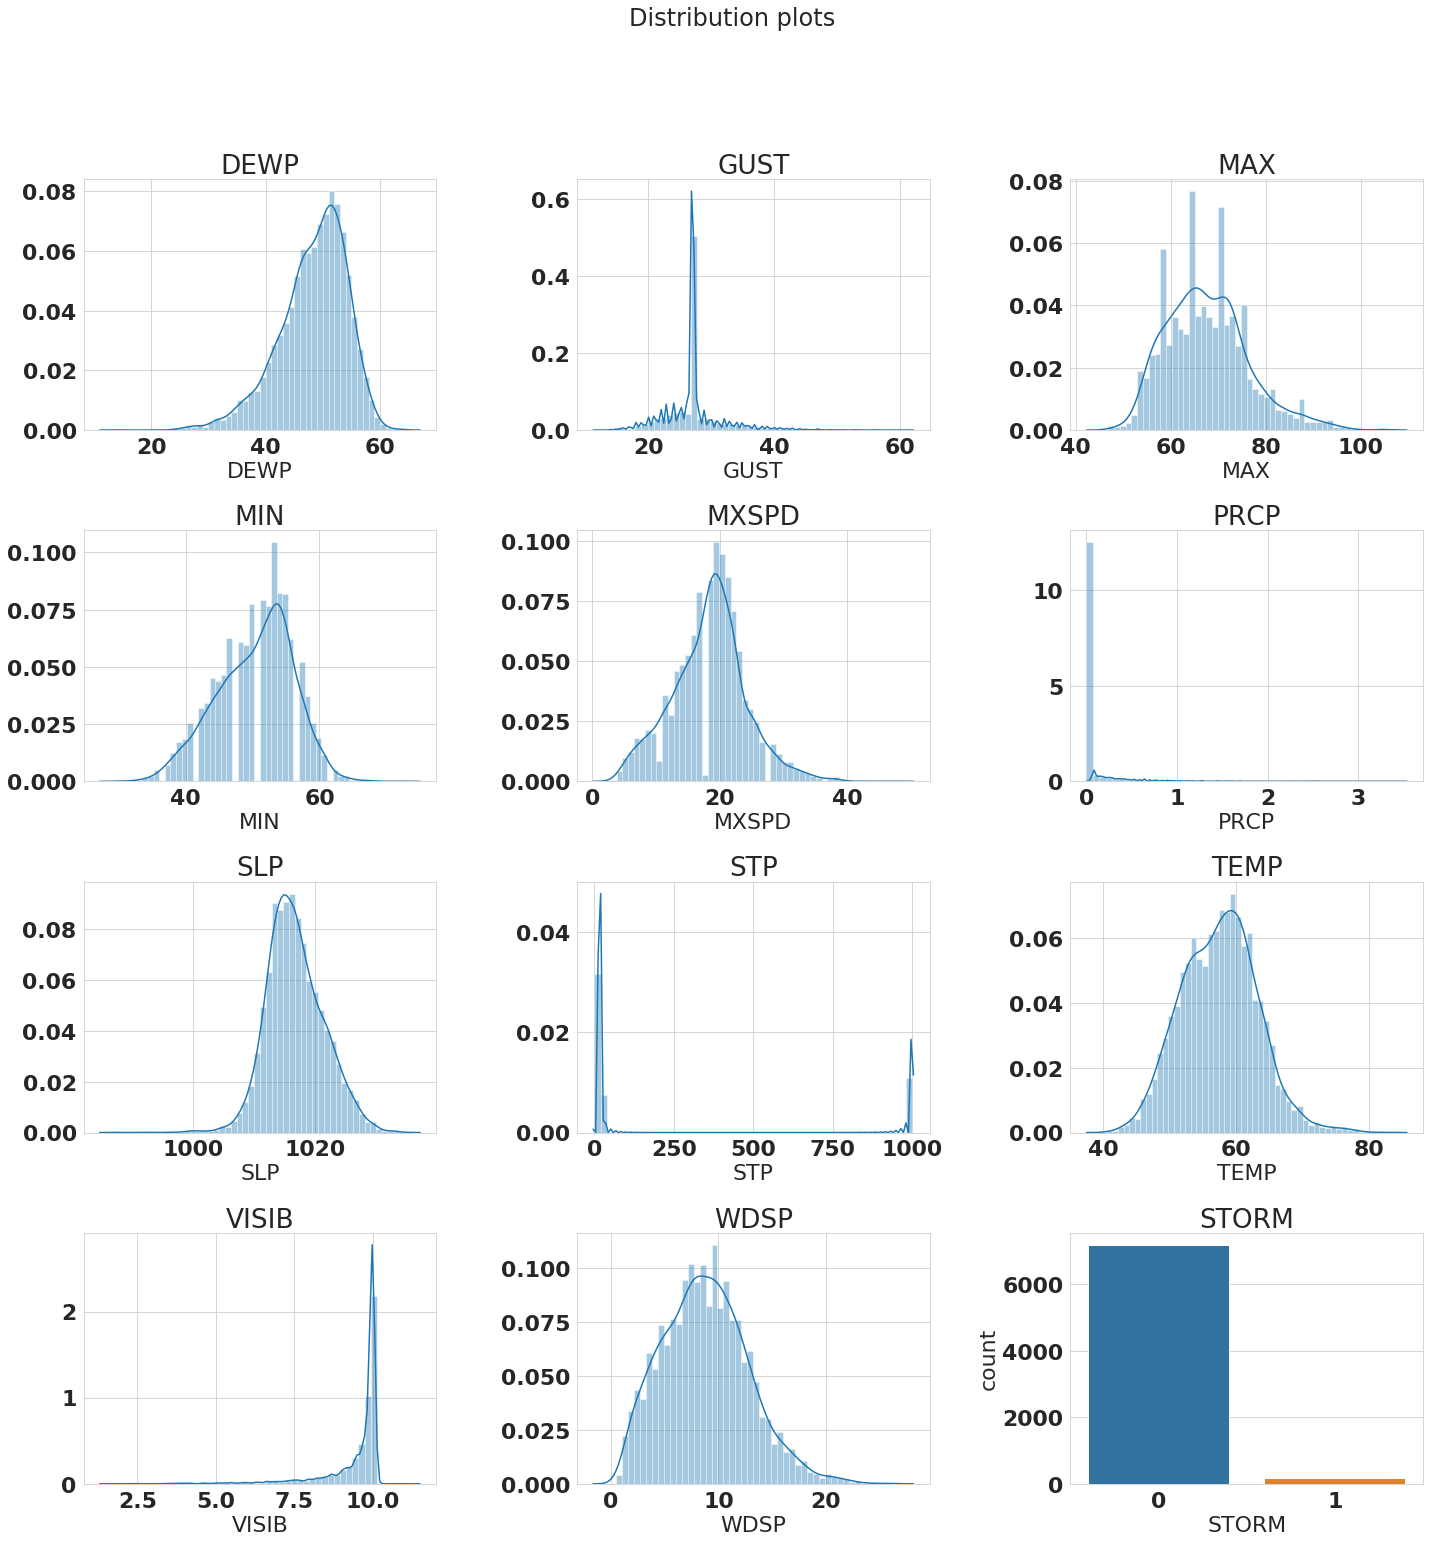

In [83]:
plt.figure(figsize = (24, 24))
plt.suptitle("Distribution plots", fontsize = 24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(4, 3, 1)
plt.title("DEWP")
sb.distplot(SF['DEWP'])

plt.subplot(4, 3, 2)
plt.title("GUST")
sb.distplot(SF['GUST'])

plt.subplot(4, 3, 3)
plt.title("MAX")
sb.distplot(SF['MAX'])

plt.subplot(4, 3, 4)
plt.title("MIN")
sb.distplot(SF['MIN'])

plt.subplot(4, 3, 5)
plt.title("MXSPD")
sb.distplot(SF['MXSPD'])

plt.subplot(4, 3, 6)
plt.title("PRCP")
sb.distplot(SF['PRCP'])

plt.subplot(4, 3, 7)
plt.title("SLP")
sb.distplot(SF['SLP'])

plt.subplot(4, 3, 8)
plt.title("STP")
sb.distplot(SF['STP'])

plt.subplot(4, 3, 9)
plt.title("TEMP")
sb.distplot(SF['TEMP'])

plt.subplot(4, 3, 10)
plt.title("VISIB")
sb.distplot(SF['VISIB'])

plt.subplot(4, 3, 11)
plt.title("WDSP")
sb.distplot(SF['WDSP'])

plt.subplot(4, 3, 12)
plt.title("STORM")
sb.countplot(SF['STORM'])

plt.show()

In [76]:
X = SF.iloc[:, :11]
y = SF['STORM']

### Simple Sampling from the Negative values

https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c

https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2


In [77]:
from imblearn.under_sampling import TomekLinks
from collections import Counter
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)


In [78]:
X_tl = pd.DataFrame(X_tl)
y_tl = pd.DataFrame(y_tl)
cols = list(SF.columns)
cols.remove('STORM')

In [80]:
X_tl.columns = cols

In [81]:
y_tl.columns = ['STORM']

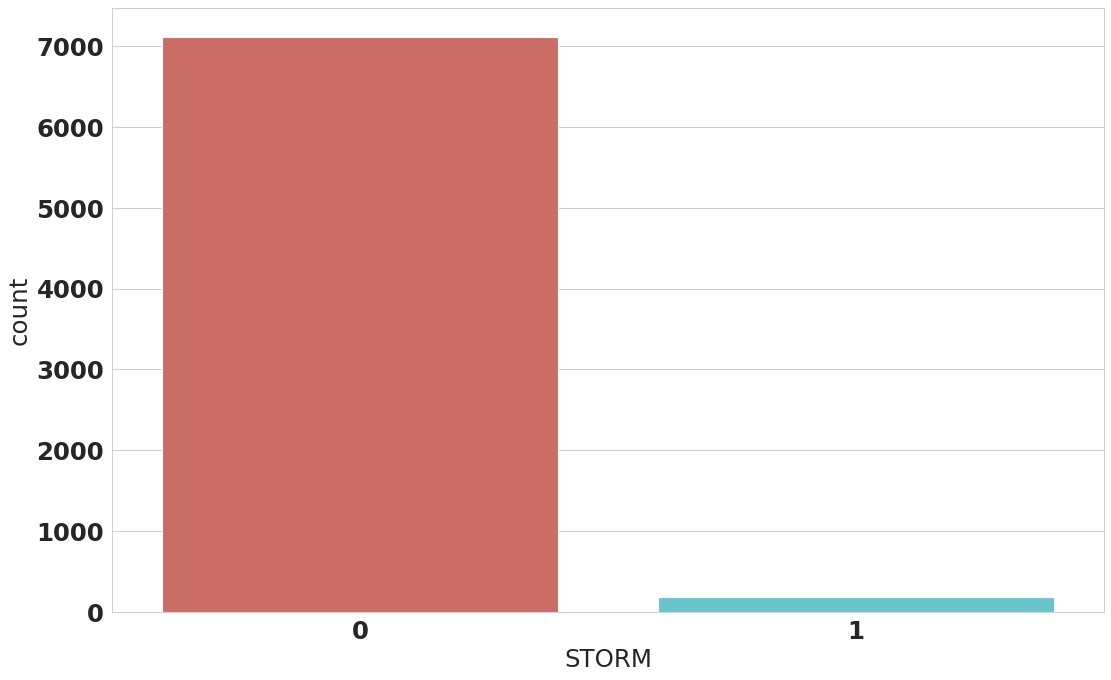

In [82]:
font = {'family' : 'normal',
  'weight' : 'bold',
  'size' : 22}
plt.rc('font', **font)
plt.figure(figsize=(16,10), dpi=80)
sb.countplot(x='STORM', data=y_tl, palette='hls')

### Checking for independence between features

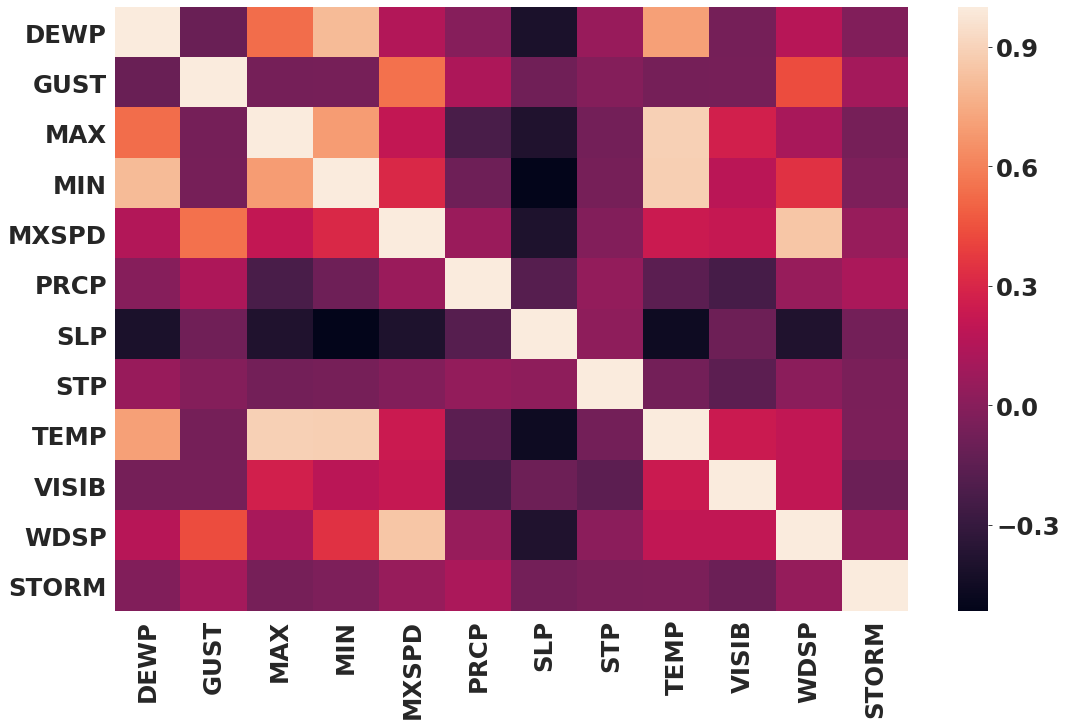

In [84]:
plt.figure(figsize=(16,10), dpi=80)
sb.heatmap(SF.corr())

### Checking that the dataset size is sufficient

In [78]:
SF.info()
SF_plot = SF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7366 entries, 0 to 59
Data columns (total 12 columns):
DEWP     7366 non-null float64
GUST     7366 non-null float64
MAX      7366 non-null float64
MIN      7366 non-null float64
MXSPD    7366 non-null float64
PRCP     7366 non-null float64
SLP      7366 non-null float64
STP      7366 non-null float64
TEMP     7366 non-null float64
VISIB    7366 non-null float64
WDSP     7366 non-null float64
STORM    7366 non-null int64
dtypes: float64(11), int64(1)
memory usage: 908.1 KB


## Feature Scaling

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
* Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

What is a Gaussian (Normal) Distribution? 
General formulae:
$$f(x) = \frac{1}{\sigma ~ {\sqrt{2 \pi}}} e^{-\frac{1}{2} ~ (\frac{x-\mu}{\sigma})^2}$$

Where $\sigma = \sqrt{\frac{\sum{(xi - \mu)^2}}{N}} $

Standard normal distribution: (is a special case where $\mu = 0$ and $\sigma = 1$)

$$f(x) = \frac{1}{{\sqrt{2 \pi}}} e^{-\frac{1}{2} x^2}$$




Gaussian distribution (also known as normal distribution) is a bell-shaped curve, and it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

### Standardization 
Does it follow a Guassion Distribution? Yes it does

## Why do we use feature scaling
* feature scaling can improve the speed of gradient descend method
* feature scaling can improve the precision of the machine learning algorithm, while the weight on the algorithm should be focus on the coef instead of the feature

The common models that dont need to use standardization: Random Forest, Decision tree, Probability Algorithm (Naive Bayes)
The models that need to use standardization: Adaboost, LR, SVM, KNN, Kmeans

### How does standardScaler works
* the standardScaler is calculated as $$z = \frac{x - \mu}{\sigma}.$$
* x is the current value, u is the population mean, s is the standard deviation

### Linear Scaling and Non-linear Scaling
Linear: used for when the range of the data discrete value is small, downside: need max and min value to be stable

Non-linear: used for when the range of the data discrete value is large, methods such as log, exponential

SKlearn standardScaler parameters:
* copy: boolean, optional, default True
    * If False, try to avoid a copy and do inplace scaling instead. This is not guaranteed to always work inplace; e.g. if the data is not a NumPy array or scipy.sparse CSR matrix, a copy may still be returned.

* with_mean: boolean, True by default
    * If True, center the data before scaling. This does not work (and will raise an exception) when attempted on sparse matrices, because centering them entails building a dense matrix which in common use cases is likely to be too large to fit in memory.

* with_std: boolean, True by default
    * If True, scale the data to unit variance (or equivalently, unit standard deviation).

In [88]:
# copy of datasets
y_stand = y_tl
X_stand = X_tl

X_stand = X_stand.copy()
scale = StandardScaler().fit(X_stand)  
X_stand = pd.DataFrame(scale.transform(X_stand))

In [92]:
scale.get_params

<bound method BaseEstimator.get_params of StandardScaler(copy=True, with_mean=True, with_std=True)>

In [91]:
X_stand.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,7.306000e+03,7.306000e+03,7.306000e+03,7.306000e+03,7.306000e+03,7.306000e+03,7.306000e+03,7.306000e+03,7.306000e+03,7.306000e+03,7.306000e+03
mean,-2.021986e-16,-9.525489e-16,-1.155691e-15,-5.712649e-16,2.428328e-16,3.156522e-16,-1.735290e-15,9.347801e-15,-4.555166e-16,-1.595782e-15,9.834880e-17
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,-5.822507e+00,-3.337752e+00,-2.408576e+00,-3.570389e+00,-2.667239e+00,-2.582734e-01,-6.369846e+00,-5.661841e-01,-2.977530e+00,-8.031954e+00,-2.088018e+00
25%,-5.724954e-01,-4.259479e-01,-7.718447e-01,-6.238986e-01,-5.708655e-01,-2.582734e-01,-6.805633e-01,-5.329138e-01,-7.181902e-01,1.684177e-02,-7.302044e-01
50%,1.532541e-01,5.124664e-03,-8.697121e-02,1.171349e-01,1.221505e-01,-2.582734e-01,-9.870480e-02,-5.242882e-01,3.492305e-02,4.192816e-01,-2.615309e-02
75%,7.134817e-01,5.124664e-03,6.211183e-01,8.052376e-01,6.419125e-01,-2.582734e-01,6.340059e-01,-5.056198e-01,6.654365e-01,5.198915e-01,6.527536e-01
max,2.665790e+00,7.642639e+00,4.347294e+00,3.804659e+00,5.077215e+00,1.767442e+01,3.866553e+00,1.897546e+00,4.413489e+00,1.827821e+00,4.323878e+00


Split the dataset to training and testing

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y_stand, test_size=0.2,
                                                  random_state=100)

### Feature Reduction on different models

Objectives: we want to find the best set & number of features for each model

There are three ways of feature selection in machine learning:
* Wrapper
* Filter
* Embed

In wrapper there are two method in sklearn
* Recursive Feature eliminationg:
    * Use the returned coef_ or feature importance_ to determine the importance for each feature, and remove the least important one, in each recursive loop, repeat the action until the need feature numbers is reached
    * Parameters: 
        * estimator: the model, 
        * n_features_to_select: number of feature selected, if None, half of the features are selected
        * step: int of float, default = 1. If greater than or equal to 1, step corresponds to the (integer) number of features to remove at each iteration. If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of features to remove at each iteration. 
        * verbose: controls verbosity of output
* RFECV
    * Uses cross validation to find the best feature number, if reducing the feature will cause the depreciation in model performance, no feature is eliminated. Good for use in a single model. Downside is 1. Large calculation 2. the best feature combination will change base on the classifier
    * parameters:
        * estimator:
        * step
        * min_features_to_select:
        * cv: Determines the cross_validation splitting strategy
            * None, default 5-fold cross-validation
            * integer, to specify the number of folds
            * cv splitter,
            * and iterable yielding (train, test) splits as arrays of indices
            * scoring: 
            * verbose
            * n_jobs
            * n_features
            * support_
            * ranking_
            * grid_scores_:
            * estimator_:

In [160]:
y_train

,STORM
4390,0
1961,0
4640,0
6364,0
534,0
...,...
79,0
3927,0
5955,0
6936,0


In [174]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC, SVR
from sklearn.model_selection import StratifiedKFold

svr = SVR(kernel = 'linear')
num_feats = 7
rfe = RFE(svr, n_features_to_select = 10, step= 1)
rfe = rfe.fit(X_train, y_train)
rfe.ranking_


array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [185]:
svc = SVC(kernel = 'linear')
rfecv = RFECV(svc, step = 1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)
print(rfecv.ranking_)
print(rfecv.grid_scores_)


[ 8  1  3  5 11 10  7  9  2  4  6]
[0.97604381 0.97604381 0.97604381 0.97604381 0.97604381 0.97604381
 0.97604381 0.97604381 0.97604381 0.97604381 0.97604381]


Using RFECV (on the basis of RFE, do a cross validation to different feature combination, and calculate the sum of decision coef, get the importance score from different feature)

We can see that for SVM the selection are all the same


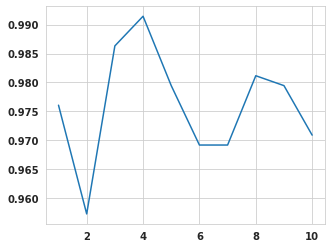

[0.97606838 0.95726496 0.98632479 0.99145299 0.97945205 0.96917808
 0.96917808 0.98116438 0.97945205 0.97089041] [0 0 0 ... 0 0 0] KFold(n_splits=10, random_state=7, shuffle=False)


In [228]:
model_svc = svc.fit(X_train, y_train)
kfold = model_selection.KFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(model_svc, X_train, y_train, cv=kfold, scoring='accuracy')
pred = cross_val_predict(model_svc, X_test, y_test, cv=10)

plt.plot(range(1, len(cv_results) + 1), cv_results)
plt.show()
print(cv_results, pred, kfold)

With the 4th fold method, we can get an accuracy of as high as 0.991

SVC: ROC AUC=0.50000


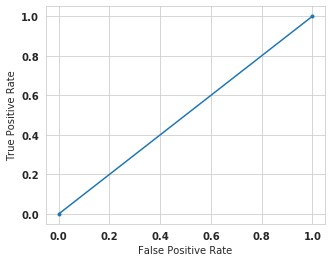

In [195]:
svc_auc = metrics.roc_auc_score(y_test, pred)
print('SVC: ROC AUC=%.5f' % (svc_auc))
# calculate roc curves
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
# print(fpr, tpr)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The roc auc curves shows that LR model only predicts 0 for all examples

[0.09982905 0.10008578 0.09988257 ... 0.09990177 0.09986892 0.09989017]


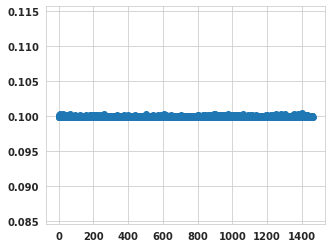

In [203]:
model_svr = SVR(kernel = "linear")
X_train_svr = pd.DataFrame(X_train, columns = [0,1,2,4,5,6,7,8,9,10])
X_test_svr = pd.DataFrame(X_test, columns = [0,1,2,4,5,6,7,8,9,10])
model_svr = model_svr.fit(X_train_svr, y_train)
pred = model_svr.predict(X_test_svr)
print(pred)
y_pred = []
for p in pred:
    if p >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
plt.scatter(range(1, len(pred) + 1), pred)
plt.show()

SVC: ROC AUC=0.62334


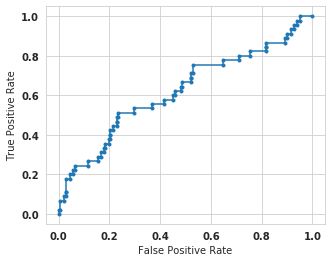

In [200]:
svr_auc = metrics.roc_auc_score(y_test, pred)
print('SVC: ROC AUC=%.5f' % (svr_auc))
# calculate roc curves
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
# print(fpr, tpr)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [204]:
print(confusion_matrix(y_test, y_pred))

[[1417    0]
 [  45    0]]


Conclusion: SVM overall has very poor performance at this training model

### Standardized data Model evaluation


In [107]:
results = []
names = []
msg = ""
cms = []
crs = []
scoring = 'accuracy'
for Xtrain, Xtest, name, model in models_train_test:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, Xtrain, y_train, cv=kfold, scoring=scoring)
    y_pred = cross_val_predict(model, Xtest, y_test, cv=10)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    cms.append(cm)
    crs.append(cr)
    results.append(cv_results)
    names.append(name)
    msg += "%s: %f (%f) \n" % (name, cv_results.mean(), cv_results.std())



### Model evaluation

In [108]:
print(msg)

LR: 0.974852 (0.006325) 
LDA: 0.975194 (0.006604) 
CART: 0.958089 (0.007863) 



Confusion matrix for each model

In [109]:
for cm in cms:
    print(cm)

[[1418    3]
 [  41    0]]
[[1400   21]
 [  32    9]]
[[1384   37]
 [  34    7]]


In [110]:
for cr in crs:
    print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1421
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1462
   macro avg       0.49      0.50      0.49      1462
weighted avg       0.94      0.97      0.96      1462

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1421
           1       0.30      0.22      0.25        41

    accuracy                           0.96      1462
   macro avg       0.64      0.60      0.62      1462
weighted avg       0.96      0.96      0.96      1462

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1421
           1       0.16      0.17      0.16        41

    accuracy                           0.95      1462
   macro avg       0.57      0.57      0.57      1462
weighted avg       0.95      0.95      0.95      1462



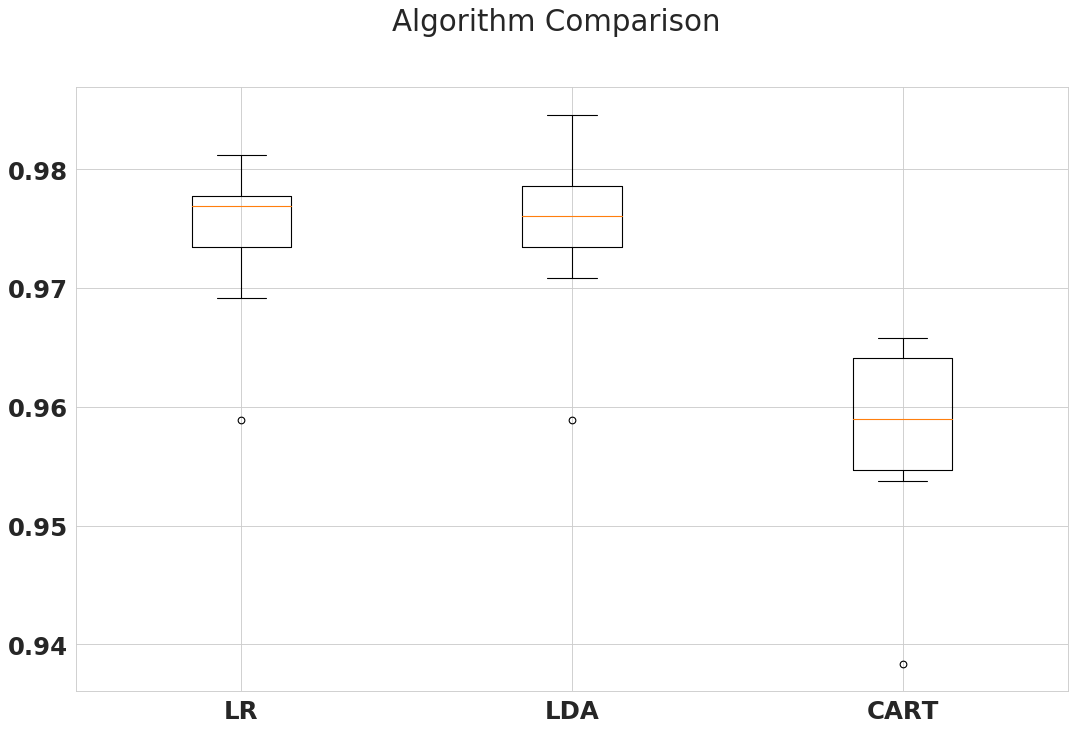

In [111]:
fig = plt.figure(figsize=(16,10), dpi=80)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## RMSE evaluation

In [112]:

rmses = []
# raw, normalized and standardized training and testing data
trainX = X_train
testX = X_test

# model fitting and measuring RMSE
for name, model in models:
    #rmse = [] 
    # fit
    model.fit(trainX,y_train)
    # predict
    pred = model.predict(testX)
    # RMSE
    rmses.append(np.sqrt(mean_squared_error(y_test,pred)))
    #rmses.append(rmse)

# RMSE_df = pd.DataFrame({'RMSE':rmses},index=['LR','LDA','KNN', 'CART', 'NB', 'SVM'])
RMSE_df = pd.DataFrame({'RMSE':rmses}, index=['LR','LDA', 'CART'])
RMSE_df

,RMSE
LR,0.169493
LDA,0.169493
CART,0.238268


* The standardized data result is similar to the raw data result
* CART method has lower accuracy score mean, however recall rate of CART is higher
* LR has highest accuracy score mean, however recall rate is comparably low in standardized data
* LR and SVM has 0 recall rate and f1 score in raw data, has increased a bit in standardized data
* Discovery for presentation...

## XGBoost model & LightBGM


In [206]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier



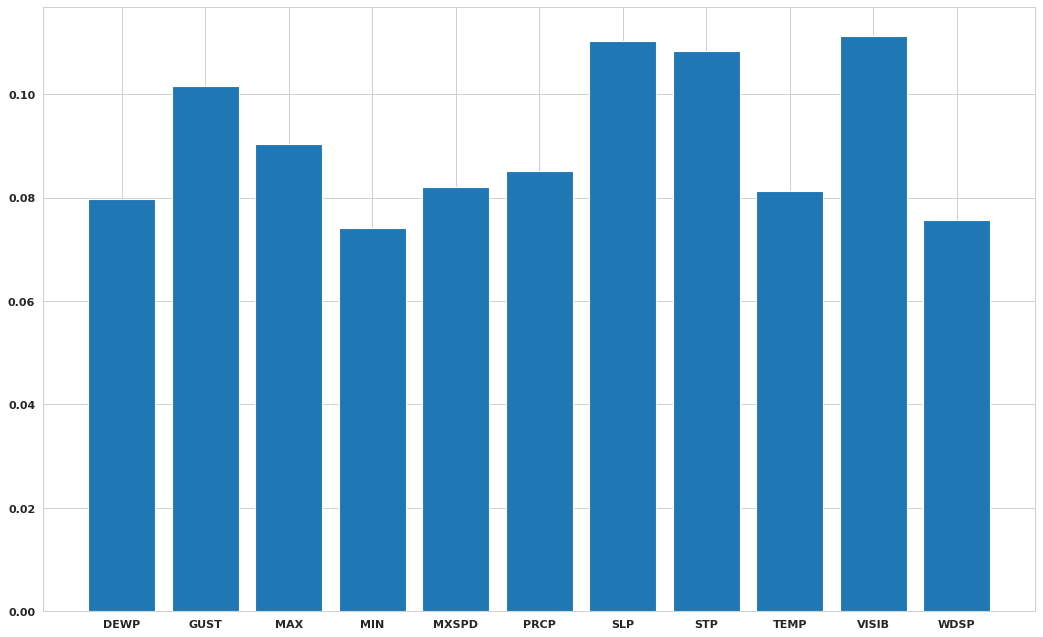

In [224]:
xgbc=XGBClassifier(learning_rate = 0.05, n_estimators = 300, max_depth=5)
num_feats = 9

xgbc.fit(X, y)
# feature importance
plt.figure(figsize=(16,10), dpi=80)
plt.bar(list(X.columns), xgbc.feature_importances_)
plt.show()

In [227]:
from sklearn.feature_selection import SelectFromModel

thresholds = np.sort(xgbc.feature_importances_)
for thresh in thresholds:
    selection = SelectFromModel(xgbc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = metrics.accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.074, n=11, Accuracy: 96.79%
Thresh=0.076, n=10, Accuracy: 96.79%
Thresh=0.080, n=9, Accuracy: 96.72%
Thresh=0.081, n=8, Accuracy: 96.79%
Thresh=0.082, n=7, Accuracy: 96.92%
Thresh=0.085, n=6, Accuracy: 96.79%
Thresh=0.090, n=5, Accuracy: 96.85%
Thresh=0.102, n=4, Accuracy: 96.85%
Thresh=0.108, n=3, Accuracy: 96.99%
Thresh=0.110, n=2, Accuracy: 96.99%
Thresh=0.111, n=1, Accuracy: 96.92%


In [115]:
top_k = []
cols = list(X.columns)

feat_import = xgbc.feature_importances_
for i in range(len(feat_import)):
    top_k.append((feat_import[i], cols[i]))
top_k = sorted(top_k, reverse=True)

In [116]:
cols_xgb = []
for i in range(num_feats):
    cols_xgb.append(top_k[i][1])
print(cols_xgb)
cols_xgb.remove('WDSP')

['PRCP', 'VISIB', 'GUST', 'SLP', 'STP', 'MAX', 'MXSPD', 'MIN', 'DEWP']


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_udrs, y_udrs, test_size=0.2,
                                                  random_state=100)
X_train_xgb = pd.DataFrame(X_train, columns=cols_xgb)
X_test_xgb = pd.DataFrame(X_test, columns=cols_xgb)


In [214]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
4390,-1.289756,0.005125,-0.771845,-1.312001,-1.783643,-0.258273,-0.594362,-0.533407,-0.683162,0.519892,-1.786281
1961,1.749054,-1.115001,0.040717,1.510984,-0.207032,0.856188,-0.465060,-0.531435,0.823065,-3.303287,-0.277600
4640,1.002084,0.005125,0.505038,0.275928,-0.207032,-0.258273,1.129663,-0.513691,0.630408,-0.586818,-0.026153
6364,0.832318,1.774576,0.725591,0.805238,1.508182,-0.258273,-1.434824,-0.543265,0.788036,0.519892,0.074426
534,0.119301,-0.914953,1.665841,0.628801,0.122150,-0.258273,-0.982268,-0.538089,1.436064,0.016842,0.275583


In [207]:
train_data = xgb.DMatrix(X_train, label = y_train)
test_data = xgb.DMatrix(X_test, label = y_test)


In [135]:
train_data

In [208]:
param = {'boosting_type': 'gbdt',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'eta': 0.01,
         'max_depth': 15,
         'colsample_bytree': 0.8,
         'subsample': 0.9,
         'subsample_freq': 8,
         'alpha': 0.6,
         'lambda': 0,
         'scale_pos_weight': 38
}

In [215]:
model = xgb.train(param, train_data, 
                  evals=[(train_data, 'train'), (test_data, 'valid')],
                 num_boost_round = 200)

[0]	train-auc:0.953384	valid-auc:0.655312
[1]	train-auc:0.995335	valid-auc:0.603489
[2]	train-auc:0.99803	valid-auc:0.668188
[3]	train-auc:0.998123	valid-auc:0.665608
[4]	train-auc:0.998631	valid-auc:0.678546
[5]	train-auc:0.998581	valid-auc:0.675739
[6]	train-auc:0.999007	valid-auc:0.657249
[7]	train-auc:0.998986	valid-auc:0.666792
[8]	train-auc:0.999314	valid-auc:0.681298
[9]	train-auc:0.999277	valid-auc:0.666518
[10]	train-auc:0.999451	valid-auc:0.664228
[11]	train-auc:0.999513	valid-auc:0.67323
[12]	train-auc:0.99957	valid-auc:0.683816
[13]	train-auc:0.999573	valid-auc:0.683533
[14]	train-auc:0.999668	valid-auc:0.684647
[15]	train-auc:0.999655	valid-auc:0.681024
[16]	train-auc:0.999664	valid-auc:0.682145
[17]	train-auc:0.999656	valid-auc:0.670383
[18]	train-auc:0.999652	valid-auc:0.665522
[19]	train-auc:0.999643	valid-auc:0.661562
[20]	train-auc:0.999679	valid-auc:0.659202
[21]	train-auc:0.999672	valid-auc:0.660049
[22]	train-auc:0.999689	valid-auc:0.659265
[23]	train-auc:0.999691	

In [216]:
y_pred = model.predict(test_data)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

In [217]:
print('prediction: ', y_pred)
print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

prediction:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [218]:
print(confusion_matrix(y_test, y_pred))

[[1407   10]
 [  42    3]]


In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1417
           1       0.23      0.07      0.10        45

    accuracy                           0.96      1462
   macro avg       0.60      0.53      0.54      1462
weighted avg       0.95      0.96      0.95      1462



# Time Series Prediction
### Code in the other file

In [126]:
forecast_SF = pd.read_csv("weather_forecast.csv")

In [130]:
forecast_SF = forecast_SF.dropna()

In [133]:
forecast_SF = pd.DataFrame(forecast_SF, columns = cols_xgb)
forecast_SF

,PRCP,VISIB,GUST,SLP,STP,MAX,MXSPD,MIN,DEWP
1,0.0,9.896494,12.894815,1015.894209,14.692069,72.549280,22.855127,58.045120,53.555280
2,0.0,9.959740,7.243569,1015.145371,13.867949,71.886768,20.104532,55.116853,52.818182
3,0.0,0.000000,17.758650,1015.518734,14.224424,71.456472,20.680038,55.534359,52.238023
4,0.0,9.967201,19.112180,1015.577709,14.442199,70.142230,22.292962,56.401074,53.291710
5,0.0,9.947253,21.720580,1015.299157,14.587935,74.378428,20.753749,56.087891,53.755029
6,0.0,0.000000,12.062040,1015.471429,15.101834,73.613028,20.017777,56.481171,55.061118
7,0.0,0.000000,12.023142,1016.760016,17.153417,74.541710,22.776069,55.246426,53.876550
8,0.0,9.997488,17.233744,1016.738364,17.161921,76.218677,22.374310,56.950370,54.376136
9,0.0,9.998982,19.325452,1016.703795,17.457862,76.709231,22.952285,56.072392,54.022518
10,0.0,9.941956,12.576067,1015.626715,15.729684,81.200237,21.312022,55.824924,54.951140


In [ ]:
train_data = xgb.DMatrix(X_train_xgb, label = y_train)
test_data = xgb.DMatrix(X_test_xgb, label = y_test)

In [178]:
forecast_data = xgb.DMatrix(forecast_SF)
y_forecast = model.predict(forecast_data)
y_prob = y_forecast

In [179]:
y_forecast = [1 if x >= 0.3 else 0 for x in y_forecast]
print('prediction: ', y_forecast)


prediction:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [180]:
y_forecast = pd.DataFrame(y_forecast)
y_forecast.columns = ['STORM']

In [181]:
y_forecast.insert(0, 'TimeStamp', pd.datetime.now().replace(microsecond=0))

In [182]:
y_forecast['TimeStamp'] = pd.date_range(start='8/4/2020', periods=len(y_forecast), freq='D')

In [184]:
y_prob = pd.DataFrame(y_prob)
y_prob.columns = ['PROB']
final_res = pd.concat([y_forecast, y_prob], axis = 1)
final_res

,TimeStamp,STORM,PROB
0,2020-08-04,0,0.000668
1,2020-08-05,0,0.006576
2,2020-08-06,0,0.004614
3,2020-08-07,0,0.000635
4,2020-08-08,0,0.000094
5,2020-08-09,0,0.002076
6,2020-08-10,0,0.000325
7,2020-08-11,0,0.000084
8,2020-08-12,0,0.000097
9,2020-08-13,0,0.001251


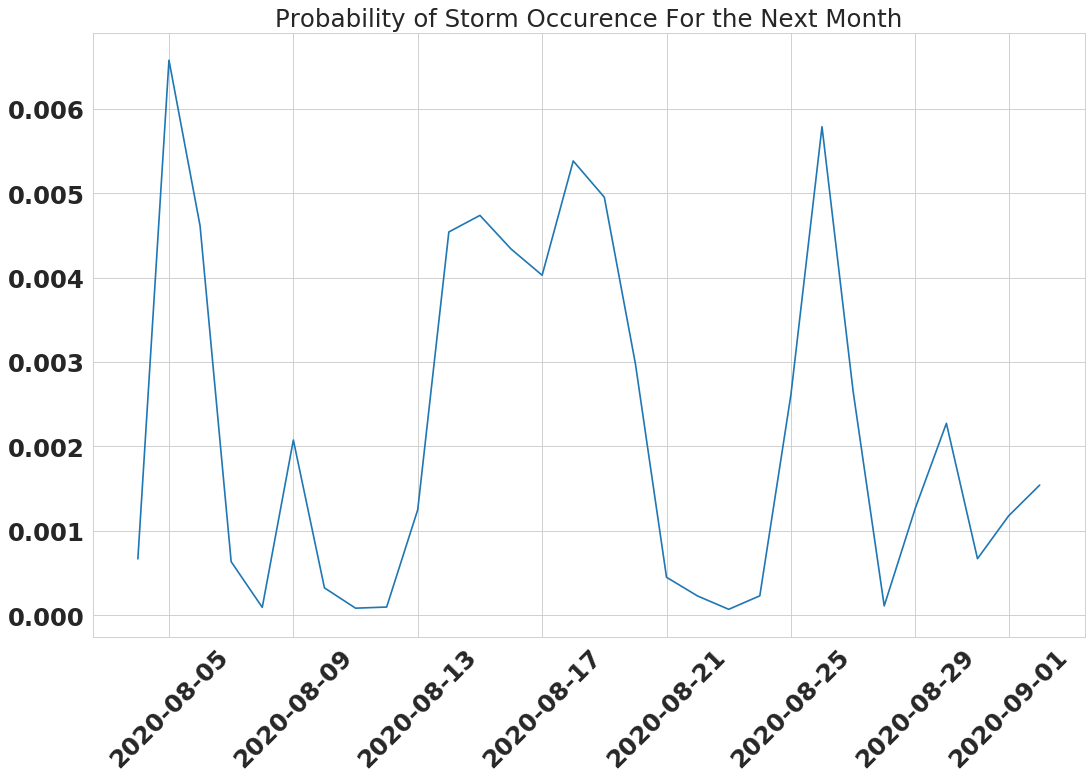

In [194]:
font = {'family' : 'normal',
  'size' : 16}
plt.figure(figsize=(16,10),dpi=80) 
plt.plot('TimeStamp', 'PROB', data=final_res) 
plt.title("Probability of Storm Occurence For the Next Month",fontsize=22)
plt.xticks(rotation = 45)
plt.show()